<a href="https://colab.research.google.com/github/Nayana-manoharan/codsoft_datascience/blob/main/ds_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
# first upload file
df=pd.read_csv("/content/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [4]:
df.shape

(200, 4)

In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
x=df.iloc[:,:-1]
x
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

<Axes: xlabel='TV', ylabel='Sales'>

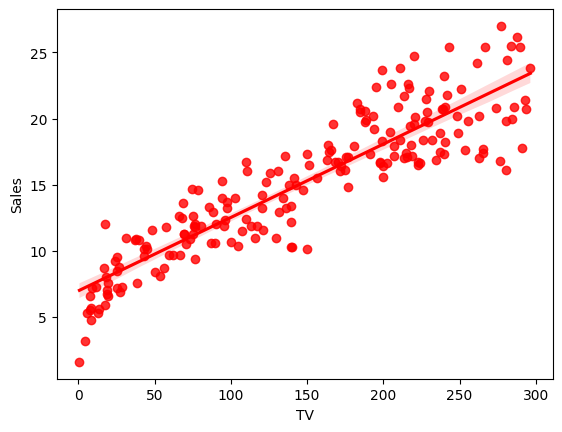

In [8]:
import seaborn as sns
sns.regplot(x=df['TV'],y=y,color='red')

<Axes: xlabel='Radio', ylabel='Sales'>

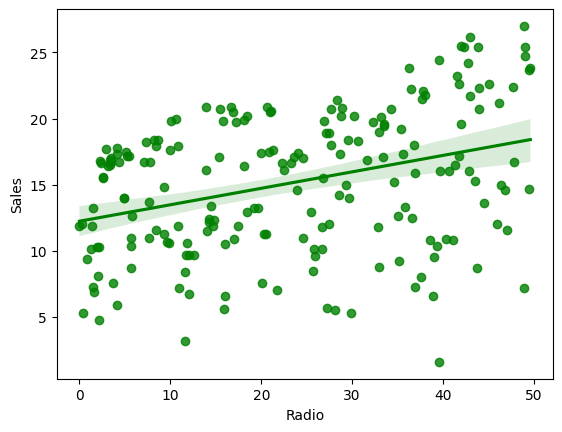

In [9]:
sns.regplot(x=df['Radio'],y=y,color='green')

<Axes: xlabel='Newspaper', ylabel='Sales'>

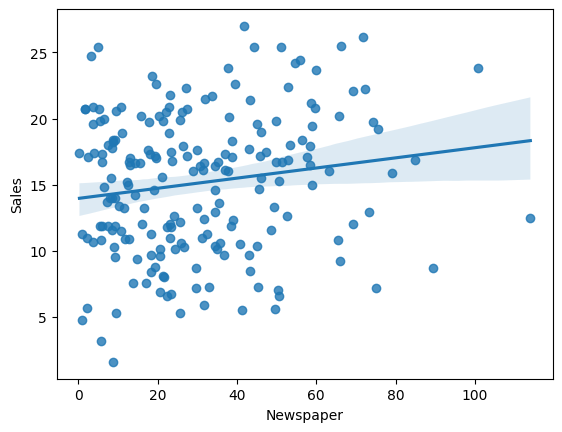

In [10]:
sns.regplot(x=df['Newspaper'],y=y)

In [11]:
# here tv most affect the sales

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


# **multiple linier regression**

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [14]:
list(zip(x,model.coef_))  #slope
print("intercept is",model.intercept_)

intercept is 4.743766701589685


In [15]:
df=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})
df

,actual_value,predicted_value
95,16.9,17.159919
15,22.4,20.533695
30,21.4,23.689144
158,7.3,9.519146
128,24.7,21.607368
115,12.6,12.781013
69,22.3,21.086363
170,8.4,8.760542
174,16.5,17.115000
45,16.1,16.687896


In [16]:
from sklearn.metrics import mean_absolute_error
print("error is",mean_absolute_error(y_test,y_pred))

from sklearn.metrics import mean_absolute_percentage_error
print("percentage error",mean_absolute_percentage_error(y_test,y_pred))

from sklearn.metrics import mean_squared_error
print("squared error is",mean_squared_error(y_test,y_pred))

from sklearn.metrics import mean_squared_error
z=mean_squared_error(y_test,y_pred)
print("root_mean_squared_error is",np.sqrt(z))

from sklearn.metrics import r2_score
print("r2 score is",r2_score(y_test,y_pred))

error is 1.1594875061090582
percentage error 0.10536440823029307
squared error is 2.541624036229147
root_mean_squared_error is 1.5942471691143587
r2 score is 0.9091484341849799


# **decition tree**

In [17]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([18. , 23.8, 19.6,  5.3, 23.8, 15.3, 22.6,  9.7, 17.8, 17.1,  8.8,
        9.7, 16.7,  1.6, 13.2, 17.9,  4.8, 17.3, 11.9, 20.9, 19.8, 15.3,
       10.8, 22.1,  9.7,  9.7, 22.6, 13.2, 11.9,  4.8, 15.5, 13.2, 23.8,
       12. , 20.1, 20.9, 10.4, 19.8, 13.2,  6.6, 13.2, 17.6,  9.6,  9.7,
       17.2,  9.6, 12.3, 10.3, 13.2, 14. , 13.6, 17.9,  4.8,  4.8, 11.9,
       13.2, 13.2, 25.5,  6.6, 16.4])

In [18]:
# performance mesurement
df=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})
df

,actual_value,predicted_value
95,16.9,18.0
15,22.4,23.8
30,21.4,19.6
158,7.3,5.3
128,24.7,23.8
115,12.6,15.3
69,22.3,22.6
170,8.4,9.7
174,16.5,17.8
45,16.1,17.1


In [19]:
from sklearn.metrics import mean_absolute_error
print("error is",mean_absolute_error(y_test,y_pred))

from sklearn.metrics import mean_absolute_percentage_error
print("percentage error",mean_absolute_percentage_error(y_test,y_pred))

from sklearn.metrics import mean_squared_error
print("squared error is",mean_squared_error(y_test,y_pred))

from sklearn.metrics import mean_squared_error
z=mean_squared_error(y_test,y_pred)
print("root_mean_squared_error is",np.sqrt(z))

from sklearn.metrics import r2_score
print("r2 score is",r2_score(y_test,y_pred))

error is 1.43
percentage error 0.13346870405783412
squared error is 3.1439999999999992
root_mean_squared_error is 1.77313282074412
r2 score is 0.8876162174850197
